In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_path = 'adult/adult.data'

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']

data = pd.read_csv(data_path, names=column_names, sep = ",", skipinitialspace=True,  header=None)

data["wage_class"] = data["wage_class"].map({"<=50K": 0, ">50K": 1})

data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [2]:
data.shape

(32561, 15)

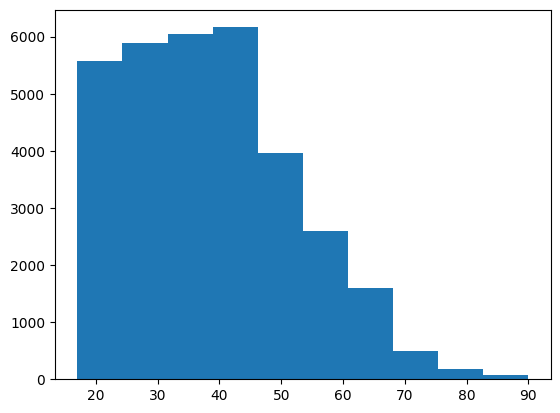

In [3]:
plt.hist(data.age)
plt.show()

In [4]:
data.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [5]:
data.groupby("workclass")["wage_class"].mean()

workclass
?                   0.104031
Federal-gov         0.386458
Local-gov           0.294792
Never-worked        0.000000
Private             0.218673
Self-emp-inc        0.557348
Self-emp-not-inc    0.284927
State-gov           0.271957
Without-pay         0.000000
Name: wage_class, dtype: float64

In [6]:
data["workclass"] = data["workclass"].replace({"Never-worked": "?", "Without-pay": "?"})
data["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1857
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Name: count, dtype: int64

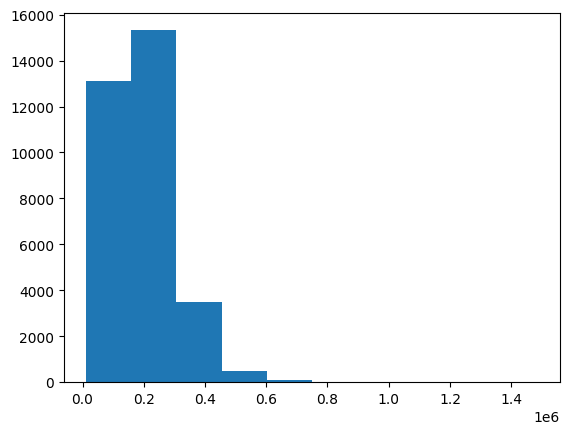

In [7]:
plt.hist(data.fnlwgt)
plt.show()

In [8]:
data = data.drop(["fnlwgt"], axis=1)

In [9]:
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [10]:
pd.crosstab(data.education, data.education_num)

education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


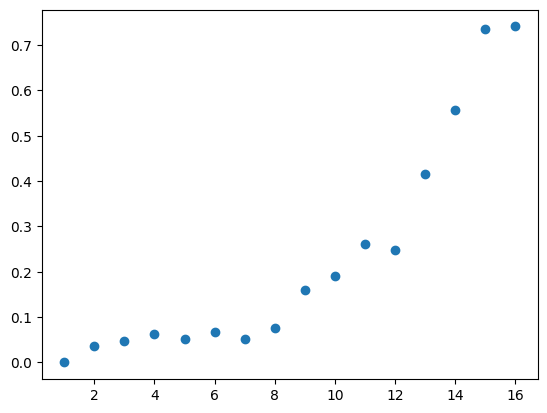

In [11]:
edu_wage = data.groupby("education_num")["wage_class"].mean()
plt.scatter(edu_wage.index, edu_wage)
plt.show()

In [12]:
data.drop(["education"], axis=1, inplace=True)

In [13]:
data

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [14]:
data["sex"] = data["sex"].replace({"Male":0, "Female":1})

C:\Users\mlempicki\AppData\Local\Temp\ipykernel_26768\2092143827.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["sex"] = data["sex"].replace({"Male":0, "Female":1})


In [15]:
data

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,1,0,0,38,United-States,0
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,0,40,United-States,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,1,0,0,40,United-States,0
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,0,0,0,20,United-States,0


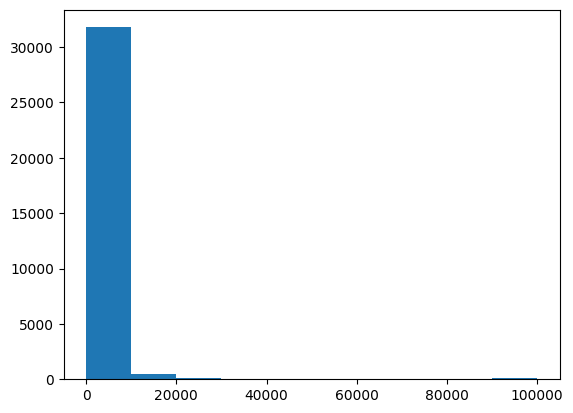

In [16]:
plt.hist(data.capital_gain)
plt.show()

In [17]:
(data.capital_gain > 0).mean()

np.float64(0.08328982525106723)

In [18]:
data.groupby(data.capital_gain > 0)["wage_class"].mean()

capital_gain
False    0.206506
True     0.618363
Name: wage_class, dtype: float64

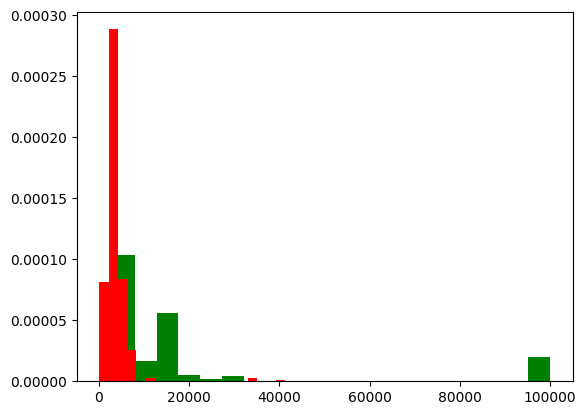

In [19]:
plt.hist(data.loc[(data['capital_gain']>0)&(data['wage_class']==1), 'capital_gain'], color='green', density=True, bins=20)
plt.hist(data.loc[(data['capital_gain']>0)&(data['wage_class']==0), 'capital_gain'], color='red', density=True, bins=20)
plt.show()

In [20]:
data["capital_gain"] = (data.capital_gain > 0).astype(int)
data["capital_loss"] = (data.capital_loss > 0).astype(int)

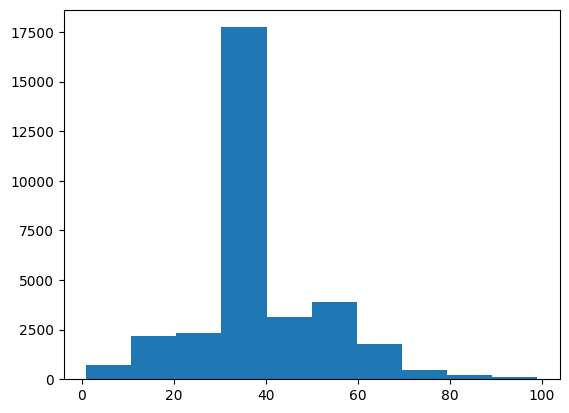

In [21]:
plt.hist(data.hours_per_week)
plt.show()

In [22]:
data.native_country.value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [23]:
data["us_native"] = (data.native_country =="United-States").astype(int)
data.drop(["native_country"], axis=1, inplace=True)

In [24]:
data

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class,us_native
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,0,1,0,40,0,1
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,0,1
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,0,1
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,0,1
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,1,0,0,38,0,1
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,0,40,1,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,1,0,0,40,0,1
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,0,0,0,20,0,1


In [25]:
def prepare_data(data_path):
    
    data = pd.read_csv(data_path, names=column_names, sep = ",", skipinitialspace=True,  header = None)
    
    data["wage_class"] = data["wage_class"].map({"<=50K": 0, ">50K": 1})

    data["workclass"] = data["workclass"].replace({"Without-pay": "?", "Never-worked": "?"})
    data["sex"] = (data["sex"] == "Male").astype(int)
    data["capital_gain"] = (data.capital_gain > 0).astype(int)
    data["capital_loss"] = (data.capital_loss > 0).astype(int)
    data["us_native"] = (data.native_country == "United-States").astype(int)
    data.drop(["fnlwgt", "education", "native_country"], axis=1, inplace=True)
    
    X = data.drop(["wage_class"], axis=1)
    y = data["wage_class"]
    
    return X, y


In [26]:
data_path = 'adult/adult.data'
X, y = prepare_data(data_path)

In [27]:
X

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,us_native
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,1,1,0,40,1
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,1
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,1
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,1
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,1
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,1


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'us_native'],
      dtype='object')

In [30]:
num_columns = ['age', 'education_num', 'hours_per_week']
cat_columns = ['workclass', 'marital_status', 'occupation', 'relationship', 'race']
bin_columns = ['sex', 'capital_gain', 'capital_loss', 'us_native']

num_pipe = Pipeline([
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("encoder", OneHotEncoder(drop="first", sparse_output=False, dtype=int))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_columns),
    ("cat", cat_pipe, cat_columns),
    ("bin", "passthrough", bin_columns)
])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'education_num', 'hours_per_week']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                sparse_output=False))]),
                                 ['workclass', 'marital_status', 'occupation',
                                  'relationship', 'race']),
                                ('bin', 'passthrough',
                                 ['sex', 'capital_gain', 'capital_loss',
                                  'us_native'])])

In [31]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(solver="saga"))
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'education_num',
                                                   'hours_per_week']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'int'>,
                                                                                 sparse_output=False))]),
                                                  ['workclass',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race']),
                                                 ('bin', 'passthrough',
                                                  ['sex', 'capital_gain',
                                                   'capital_loss',
                                                   'us_native'])])),
                ('model', LogisticRegression(solver='saga'))])

In [32]:
X_train.head(3)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,us_native
5514,33,Local-gov,13,Never-married,Prof-specialty,Not-in-family,White,0,0,0,50,1
19777,36,Private,11,Married-civ-spouse,Exec-managerial,Husband,White,1,0,1,50,1
10781,58,Self-emp-not-inc,5,Separated,Craft-repair,Not-in-family,White,1,0,0,40,1


In [33]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'education_num',
                                                   'hours_per_week']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'int'>,
                                                                                 sparse_output=False))]),
                                                  ['workclass',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race']),
                                                 ('bin', 'passthrough',
                                                  ['sex', 'capital_gain',
                                                   'capital_loss',
                                                   'us_native'])])),
                ('model', LogisticRegression(solver='saga'))])

In [34]:
y_pred = pipeline.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [35]:
accuracy_score(y_test, y_pred)

0.8515277138031629

In [36]:
pipeline.named_steps["preprocessor"].get_feature_names_out()

array(['num__age', 'num__education_num', 'num__hours_per_week',
       'cat__workclass_Federal-gov', 'cat__workclass_Local-gov',
       'cat__workclass_Private', 'cat__workclass_Self-emp-inc',
       'cat__workclass_Self-emp-not-inc', 'cat__workclass_State-gov',
       'cat__marital_status_Married-AF-spouse',
       'cat__marital_status_Married-civ-spouse',
       'cat__marital_status_Married-spouse-absent',
       'cat__marital_status_Never-married',
       'cat__marital_status_Separated', 'cat__marital_status_Widowed',
       'cat__occupation_Adm-clerical', 'cat__occupation_Armed-Forces',
       'cat__occupation_Craft-repair', 'cat__occupation_Exec-managerial',
       'cat__occupation_Farming-fishing',
       'cat__occupation_Handlers-cleaners',
       'cat__occupation_Machine-op-inspct',
       'cat__occupation_Other-service', 'cat__occupation_Priv-house-serv',
       'cat__occupation_Prof-specialty',
       'cat__occupation_Protective-serv', 'cat__occupation_Sales',
       'cat__oc

In [37]:
pipeline.named_steps["preprocessor"].transformers_

[('num',
  Pipeline(steps=[('scaler', StandardScaler())]),
  ['age', 'education_num', 'hours_per_week']),
 ('cat',
  Pipeline(steps=[('encoder',
                   OneHotEncoder(drop='first', dtype=<class 'int'>,
                                 sparse_output=False))]),
  ['workclass', 'marital_status', 'occupation', 'relationship', 'race']),
 ('bin',
  FunctionTransformer(accept_sparse=True, check_inverse=False,
                      feature_names_out='one-to-one'),
  ['sex', 'capital_gain', 'capital_loss', 'us_native'])]

In [38]:
pipeline.named_steps["preprocessor"].named_transformers_['num']

Pipeline(steps=[('scaler', StandardScaler())])

Zoptymalizuj pipeline z regresją logistyczną - zoptymalizuj siłę regularyzacji (rozpatrz C na skali logarytmicznej). Użyj GridSearchCV.

In [39]:
parameters = {
    'model__C': np.logspace(-5, 5, 11)
}

cv = KFold(n_splits=10, shuffle=True)
optimizer = GridSearchCV(pipeline, parameters, cv=cv, scoring='accuracy', n_jobs=-1)
optimizer.fit(X_train, y_train)

print(optimizer.best_params_)
accuracy_score(y_test, optimizer.predict(X_test))

{'model__C': np.float64(1.0)}


0.8515277138031629

Zoptymalizuj rozwiązanie oparte na drzewie decyzyjnym. Zoptymalizuj kryterium podziału i minimalną liczbę obserwacji w liściach. Dostosuj pipeline do drzewa.

In [40]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [41]:
num_pipe = Pipeline([
    ("scaler", "passthrough")
])

cat_pipe = Pipeline([
    ("encoder", OneHotEncoder(drop=None, sparse_output=False, dtype=int))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_columns),
    ("cat", cat_pipe, cat_columns),
    ("bin", "passthrough", bin_columns)
])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier())
])

parameters = {
    'model__criterion': ["entropy", "gini"],
    'model__min_samples_leaf': [1, 5, 15, 25, 50, 75, 100]
}

cv = KFold(n_splits=10, shuffle=True)
optimizer = GridSearchCV(pipeline, parameters, cv=cv, scoring='accuracy', n_jobs=-1)
optimizer.fit(X_train, y_train)

print(optimizer.best_params_) # jeżeli wychodzi skrajnie to poszerzamy siatkę
accuracy_score(y_test, optimizer.predict(X_test))

{'model__criterion': 'entropy', 'model__min_samples_leaf': 75}


0.8436972209427299

In [42]:
pipeline_reg = pipeline

In [43]:
pipeline_reg = pipeline_reg.set_params(preprocessor__cat__encoder__drop="first")
pipeline_reg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   'passthrough')]),
                                                  ['age', 'education_num',
                                                   'hours_per_week']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'int'>,
                                                                                 sparse_output=False))]),
                                                  ['workclass',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race']),
                                                 ('bin', 'passthrough',
                                                  ['sex', 'capital_gain',
                                                   'capital_loss',
                                                   'us_native'])])),
                ('model', DecisionTreeClassifier())])

In [44]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   'passthrough')]),
                                                  ['age', 'education_num',
                                                   'hours_per_week']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'int'>,
                                                                                 sparse_output=False))]),
                                                  ['workclass',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race']),
                                                 ('bin', 'passthrough',
                                                  ['sex', 'capital_gain',
                                                   'capital_loss',
                                                   'us_native'])])),
                ('model', DecisionTreeClassifier())])

In [45]:
from copy import deepcopy

In [46]:
pipeline_reg = deepcopy(pipeline)

In [47]:
num_pipe = Pipeline([
    ("scaler", None)
])

cat_pipe = Pipeline([
    ("encoder", OneHotEncoder(sparse_output=False, dtype=int))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_columns),
    ("cat", cat_pipe, cat_columns),
    ("bin", "passthrough", bin_columns)
])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", None)
])


parameters = [
    {
        'preprocessor__num__scaler': [StandardScaler()],
        'preprocessor__cat__encoder__drop': ["first"],
        'model': [LogisticRegression(solver="saga")],
        'model__C': np.logspace(-3, 3, 7),
    },
    {
        'preprocessor__num__scaler': ["passthrough"],
        'preprocessor__cat__encoder__drop': [None],
        'model': [DecisionTreeClassifier()],
        'model__criterion': ["entropy", "gini"],
        'model__min_samples_leaf': [1, 5, 15, 25, 50, 75, 100]
    }
]

cv = KFold(n_splits=10, shuffle=True)
optimizer = GridSearchCV(pipeline, parameters, cv=cv, scoring='accuracy', n_jobs=-1)
optimizer.fit(X_train, y_train)

print(optimizer.best_params_) # jeżeli wychodzi skrajnie to poszerzamy siatkę
accuracy_score(y_test, optimizer.predict(X_test))

{'model': LogisticRegression(solver='saga'), 'model__C': np.float64(1.0), 'preprocessor__cat__encoder__drop': 'first', 'preprocessor__num__scaler': StandardScaler()}


0.8515277138031629

Uproszczenie obliczeń (ale zawiera przeciek informacji przy kroswalidacji)

In [48]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", GridSearchCV(model, siatka_paramaetrow_modelu))
])

NameError: name 'model' is not defined

In [49]:
X_train_transformed = preprocessor.fit_transform(X_train)
GridSearchCV(model, siatka_paramaetrow_modelu) na danych X_train_transformed

SyntaxError: invalid syntax (2922718393.py, line 2)

AUC

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
cv = KFold(n_splits=10, shuffle=True)
optimizer = GridSearchCV(pipeline, parameters, cv=cv, scoring='roc_auc', n_jobs=-1)
optimizer.fit(X_train, y_train)

In [ ]:
roc_auc_score(y_test, optimizer.predict_proba(X_test)[:, 1])

In [ ]:
GridSearchCV?

In [ ]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
optimizer = GridSearchCV(pipeline, parameters, cv=cv, scoring='roc_auc', n_jobs=-1)
optimizer.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import BaggingClassifier
?BaggingClassifier

Narysuj wykres AUC względem liczby drzew w baggingu na danych adult. Następnie zrób ten sam wykres z np. max_samples=0.2.

In [ ]:
n_estimators = [10, 25, 50, 100, 200, 300, 500, 750]

estimators_roc_auc = []
for n in n_estimators:
    model = BaggingClassifier(None, n, n_jobs=-1)
    pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("model", model),
        ],
    )
    pipeline.fit(X_train, y_train)
    y_probs = pipeline.predict_proba(X_test)[:, 1]
    estimators_roc_auc.append(roc_auc_score(y_test, y_probs))

plt.plot(n_estimators, estimators_roc_auc, label="n_estimators", marker="o")
plt.xlabel("n_estimators")
plt.ylabel("roc_auc")
plt.title("ROC AuC vs n_estimators")
plt.show()

In [ ]:
BaggingClassifier(DecisionTreeClassifier(max_depth=5))

Narysuj analogiczne wykresy dla:

* liczby obserwacja dla pojedynczego drzewa
* liczba zmiennych dla pojedynczego drzewa
* głębokość pojedynczego drzewa

Przyjmij sztywno 100 drzew w komitecie.

In [ ]:
BaggingClassifier?

In [ ]:
param_values = np.arange(0.05, 1.05, 0.05)

estimators_roc_auc = []
for param in param_values:
    model = BaggingClassifier(None, 100, max_samples=param, n_jobs=-1)
    pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("model", model),
        ],
    )
    pipeline.fit(X_train, y_train)
    y_probs = pipeline.predict_proba(X_test)[:, 1]
    estimators_roc_auc.append(roc_auc_score(y_test, y_probs))

plt.plot(param_values, estimators_roc_auc, marker="o")
plt.show()

In [ ]:
plt.plot(param_values, estimators_roc_auc, marker="o")
plt.show()

In [ ]:
param_values = np.arange(0.05, 1.05, 0.05)

estimators_roc_auc = []
for param in param_values:
    model = BaggingClassifier(None, 100, max_features=param, n_jobs=-1)
    pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("model", model),
        ],
    )
    pipeline.fit(X_train, y_train)
    y_probs = pipeline.predict_proba(X_test)[:, 1]
    estimators_roc_auc.append(roc_auc_score(y_test, y_probs))

plt.plot(param_values, estimators_roc_auc, marker="o")
plt.show()

In [ ]:
param_values = np.arange(3, 15)

estimators_roc_auc = []
for param in param_values:
    model = BaggingClassifier(DecisionTreeClassifier(max_depth=param), 100, n_jobs=-1)
    pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("model", model),
        ],
    )
    pipeline.fit(X_train, y_train)
    y_probs = pipeline.predict_proba(X_test)[:, 1]
    estimators_roc_auc.append(roc_auc_score(y_test, y_probs))

plt.plot(param_values, estimators_roc_auc, marker="o")
plt.show()

In [ ]:
def plot_quality_vs_param(param_name, param_values, preprocessor, X_train, y_train, X_test, y_test):
    pass

In [ ]:
def plot_quality_vs_param(param_name, param_values, preprocessor, X_train, y_train, X_test, y_test):
    quality_metric = []

    for value in param_values:
        # Create the model with selected hyperparameter
        hyperparams = {param_name: value}
        
        # model = BaggingClassifier(**hyperparams, n_jobs=-1)
        
        model = BaggingClassifier(DecisionTreeClassifier(), n_jobs=-1)
        model.set_params(**hyperparams)

        # Create a pipeline with the preprocessor and model
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        # Get the score of fitted model
        pipeline.fit(X_train, y_train)
        y_probs = pipeline.predict_proba(X_test)[:, 1]
        score = roc_auc_score(y_test, y_probs)
        quality_metric.append(score)

    # Plot the visualization
    plt.figure(figsize=(10, 5))
    plt.plot(param_values, quality_metric, marker='o')
    plt.title('ROC AUC ' + param_name)
    plt.xlabel(param_name)
    plt.ylabel('ROC AUC')
    plt.show()

In [ ]:
param_name = "max_samples"
param_values = [0.1, 0.5, 0.9]

plot_quality_vs_param(param_name, param_values, preprocessor, X_train, y_train, X_test, y_test)

In [ ]:
param_name = "estimator__max_depth"
param_values = [5, 7]

plot_quality_vs_param(param_name, param_values, preprocessor, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.ensemble import BaggingClassifier

BaggingClassifier().get_params().keys()

In [ ]:
import inspect

In [ ]:
inspect.signature(BaggingClassifier).parameters

# można by było automatycznie sprawdzać, czy parametr, który przekazujemy dotyczy baggingu czy drzewa

In [ ]:
from sklearn.ensemble import RandomForestClassifier
?RandomForestClassifier

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])

param_grid = {
    'model__n_estimators': [100, 200],
    'model__min_samples_leaf': [5, 25, 50],
    'model__max_samples': [0.1, 0.2],
}


cv = KFold(n_splits=10, shuffle=True)
optimizer = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
optimizer.fit(X_train, y_train)

optimizer.best_params_

Robudować powyższą funkcje o parametryzację czy bagging czy las i powtórzyć analizy.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier?

In [ ]:
BaggingClassifier(DecisionTreeClassifier())

In [ ]:
from sklearn.ensemble import VotingClassifier

# komitet z arbitralnie zdefiniowanych modeli

?VotingClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
?AdaBoostClassifier

In [ ]:
DecisionTreeClassifier?

In [ ]:
AdaBoostClassifier(DecisionTreeClassifier(max_features="sqrt", max_depth=7))

TO DO: zrobić analizy czasu uczenia wzgłęem różnych parametrów w roznych wariantach komitetów.

In [ ]:
def prepare_data(data_path):
    
    data = pd.read_csv(data_path, names=column_names, sep = ",", skipinitialspace=True,  header = None)
    
    data["wage_class"] = data["wage_class"].map({"<=50K": 0, ">50K": 1})

    data["workclass"] = data["workclass"].replace({"Without-pay": "?", "Never-worked": "?"})
    data["sex"] = (data["sex"] == "Male").astype(int)
    # data["capital_gain"] = (data.capital_gain > 0).astype(int)
    # data["capital_loss"] = (data.capital_loss > 0).astype(int)
    data["us_native"] = (data.native_country == "United-States").astype(int)
    data.drop(["fnlwgt", "education", "native_country"], axis=1, inplace=True)
    
    X = data.drop(["wage_class"], axis=1)
    y = data["wage_class"]
    
    return X, y

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
num_columns = ["education_num", "hours_per_week"]
cat_columns = ["workclass", "marital_status", "occupation", "relationship", "race"]
bin_columns = ["sex", "capital_gain", "capital_loss", "us_native"]
age_pipe = Pipeline([
    ("transformer", None),
    ("scaler", None)
])
num_pipe = Pipeline([
    ("scaler", None)
])
cat_pipe = Pipeline([
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
])
preprocessor = ColumnTransformer([
    ("age",  age_pipe, ["age"]),
    ("num", num_pipe, num_columns),
    ("cat", cat_pipe, cat_columns),
    ("bin", "passthrough", bin_columns)
])
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", None)
])
param_grid = [
    {
        "preprocessor__age__transformer": [FunctionTransformer(func=np.log1p, inverse_func=np.expm1), None],
        "preprocessor__age__scaler": [StandardScaler()],
        "preprocessor__num__scaler": [StandardScaler()],
        "preprocessor__cat__encoder__drop": ["first"],
        "model__C": [0.1, 1, 10],
        "model": [LogisticRegression()],
    },
    {
        "preprocessor__age__transformer": [FunctionTransformer(func=np.log1p, inverse_func=np.expm1), None],
        "preprocessor__age__scaler": [MinMaxScaler()],
        "preprocessor__num__scaler": [MinMaxScaler()],
        "preprocessor__cat__encoder__drop": ["first"],
        "model__C": [0.1, 1, 10],
        "model": [LogisticRegression()],
    },
    {
        "preprocessor__num__scaler": [None],
        "preprocessor__cat__encoder__drop": [None],
        "model__min_samples_leaf": [5, 10, 100],
        "model": [DecisionTreeClassifier()],
    }
]
param_grid = [
    {
        "preprocessor__num__scaler": [StandardScaler(), MinMaxScaler()],
        "preprocessor__cat__encoder__drop": ["first"],
        "model__C": [0.1, 1, 10],
        "model": [LogisticRegression()],
    },
        {
        "preprocessor__num__scaler": [None],
        "preprocessor__cat__encoder__drop": [None],
        "model__min_samples_leaf": [5, 10, 100],
        "model": [DecisionTreeClassifier()],
    }
]
class GridBuilder:
    def __init__(self, param_grid):
        self.param_grid = param_grid
    def add_param(self, params: dict):
        for grid in self.param_grid:
            grid.update(params)
        return self
    def build(self):
        return self.param_grid
new_param_grid = GridBuilder(param_grid).add_param({"preprocessor__cat__encoder__max_categories": [2, 5, 7, None]}).build()
new_param_grid
cv = KFold(10, shuffle=True)
optimizer = GridSearchCV(pipeline, new_param_grid, cv=cv, scoring="accuracy", n_jobs=-1)
optimizer.fit(X_train, y_train)
print(optimizer.best_params_)
accuracy_score(y_test, optimizer.best_estimator_.predict(X_test))

In [ ]:
data_path = 'adult/adult.data'
X, y = prepare_data(data_path)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Przetestuje dwa warianty obsługi capital gain i loss: wartości nominalne i binaryzacja.

Jako algorytm użyć AdaBoost i zoptymalizuj liczbe drzew.

In [ ]:
from sklearn.preprocessing import Binarizer
?Binarizer

In [ ]:
num_columns = ['age', 'education_num', 'hours_per_week']
cat_columns = ['workclass', 'marital_status', 'occupation', 'relationship', 'race']
bin_columns = ['sex', 'us_native']
capital_columns = ['capital_gain', 'capital_loss']

num_pipe = Pipeline([
    ('scaler', 'passthrough')
])

cat_pipe = Pipeline([
    ('encoder', OneHotEncoder(drop=None, sparse_output=False, dtype=int))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_columns),
    ("cat", cat_pipe, cat_columns),
    ("bin", "passthrough", bin_columns),
    ('capital', "passthrough", capital_columns)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', None)
])

parameters = [
    {
        'preprocessor__capital': ['passthrough', Binarizer(threshold=0)],
        'model': [AdaBoostClassifier()],
        'model__n_estimators': [20, 50],
    }
]

cv = KFold(n_splits=10, shuffle=True)
optimizer = GridSearchCV(pipeline,
                         param_grid=parameters,
                         n_jobs=-1,
                         cv=cv,
                         scoring = "roc_auc")
optimizer.fit(X_train, y_train)

roc_auc_score(y_test, optimizer.predict_proba(X_test)[:, 1])

In [ ]:
parameters = [
    {
        'preprocessor__capital': ["passthrough"],
        'model': [AdaBoostClassifier(algorithm='SAMME')],
        'model__n_estimators': [10,20,50,100],
    },
    {
        'preprocessor__capital': [Binarizer()],
        'preprocessor__capital__threshold': [0.1, 0.2 ,0.5 ,0.7],
        'model': [AdaBoostClassifier(algorithm='SAMME')],
        'model__n_estimators': [10,20,50,100],
    }
]

In [ ]:
threshold_values = [0.1, 0.2 ,0.5 ,0.7]

parameters = [
    {
        'preprocessor__capital': ['passthrough', *[Binarizer(threshold=t) for t in threshold_values]],
        'model': [AdaBoostClassifier()],
        'model__n_estimators': [20, 50],
    }
]

parameters

In [ ]:
capital_pipe = Pipeline([
    ('transformer', Binarizer())
])

...

parameters = [
    {
        'preprocessor__capital': ["passthrough"],
        'model': [AdaBoostClassifier(algorithm='SAMME')],
        'model__n_estimators': [10,20,50,100],
    },
    {
        'preprocessor__capital__transformer__threshold': [0.1, 0.2 ,0.5 ,0.7],
        'model': [AdaBoostClassifier(algorithm='SAMME')],
        'model__n_estimators': [10,20,50,100],
    }
]

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
?KBinsDiscretizer

Rozszerzyć powyższą optymalizacj o uwzględnienie KBinsDiscretizer, testując rózne liczby koszyków i trzy startegie podziału.

In [ ]:
parameters = [
    {
        'preprocessor__capital': ["passthrough"],
        'model': [AdaBoostClassifier(algorithm='SAMME')],
        'model__n_estimators': [10,20,50,100],
    },
    {
        'preprocessor__capital': [Binarizer()],
        'preprocessor__capital__threshold': [0.1, 0.2 ,0.5 ,0.7],
        'model': [AdaBoostClassifier(algorithm='SAMME')],
        'model__n_estimators': [10,20,50,100],
    },
    {
        'preprocessor__capital': [KBinsDiscretizer()],
        'preprocessor__capital__n_bins': [3, 5],
        'preprocessor__capital__strategy': ["uniform", "quantile", "kmeans"],
        'model': [AdaBoostClassifier(algorithm='SAMME')],
        'model__n_estimators': [10,20,50,100],
    }
]

In [ ]:
common_subgrid = {
    'model': [AdaBoostClassifier(algorithm='SAMME')],
    'model__n_estimators': [10,20,50,100],
}

variant_specific_subgrids = [
    {
        'preprocessor__capital': ["passthrough"]
    },
    {
        'preprocessor__capital': [Binarizer()],
        'preprocessor__capital__threshold': [0.1, 0.2 ,0.5 ,0.7]
    },
    {
        'preprocessor__capital': [KBinsDiscretizer()],
        'preprocessor__capital__n_bins': [3, 5],
        'preprocessor__capital__strategy': ["uniform", "quantile", "kmeans"],
    }
]

In [ ]:
def build_grid(common_subgrid, variant_specific_subgrids):
    
    for variant_subgrid in variant_specific_subgrids:
        variant_subgrid.update(common_subgrid)
        
    return variant_specific_subgrids
        
build_grid(common_subgrid, variant_specific_subgrids)     

In [ ]:
variant_specific_subgrids

In [ ]:
common_subgrid = {
    'model': [AdaBoostClassifier(algorithm='SAMME')],
    'model__n_estimators': [10,20,50,100],
}

variant_specific_subgrids = [
    {
        'preprocessor__capital': ["passthrough"]
    },
    {
        'preprocessor__capital': [Binarizer()],
        'preprocessor__capital__threshold': [0.1, 0.2 ,0.5 ,0.7]
    },
    {
        'preprocessor__capital': [KBinsDiscretizer(encode="oridnal")], # encode="oridnal" - lepsze dla drzew
        'preprocessor__capital__n_bins': [3, 5],
        'preprocessor__capital__strategy': ["uniform", "quantile", "kmeans"],
    }
]

In [ ]:
def build_grid(common_subgrid, variant_specific_subgrids):
    
    grid = deepcopy(variant_specific_subgrids)
    for variant_subgrid in grid:
        variant_subgrid.update(common_subgrid)
        
    return grid
        
build_grid(common_subgrid, variant_specific_subgrids)     

In [ ]:
variant_specific_subgrids

In [ ]:
def build_grid(common_subgrid, variant_specific_subgrids):
    
    grid = []
    for variant_subgrid in variant_specific_subgrids:
        grid.append({**common_subgrid, **variant_subgrid})
        
    return grid

build_grid(common_subgrid, variant_specific_subgrids)     

In [ ]:
def build_grid(common_subgrid, variant_specific_subgrids):
    return [{**common_subgrid, **variant_subgrid} for variant_subgrid in variant_specific_subgrids]

build_grid(common_subgrid, variant_specific_subgrids)     

In [ ]:
KBinsDiscretizer?

In [ ]:
np.log1p

In [ ]:
from sklearn.preprocessing import FunctionTransformer
FunctionTransformer?

In [ ]:
num_columns = ['age', 'education_num', 'hours_per_week']
cat_columns = ['workclass', 'marital_status', 'occupation', 'relationship', 'race']
bin_columns = ['sex', 'us_native']
capital_columns = ['capital_gain', 'capital_loss']

num_pipe = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('encoder', OneHotEncoder(drop="first", sparse_output=False, dtype=int))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_columns),
    ("cat", cat_pipe, cat_columns),
    ("bin", "passthrough", bin_columns),
    ('capital', "passthrough", capital_columns)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', None)
])

log1p_transformer = Pipeline([
    ("log_transformer", FunctionTransformer(np.log1p)),
    ('scaler', StandardScaler())
])

parameters = [
    {
        'preprocessor__capital': [Binarizer(threshold=0), log1p_transformer],
        'model': [LogisticRegression()],
        'model__C': [1],
        'model__class_weight': [{0:1, 1:1}, {0:1, 1:2}, {0:1, 1:3}]
    }
]

cv = KFold(n_splits=10, shuffle=True)
optimizer = GridSearchCV(pipeline,
                         param_grid=parameters,
                         n_jobs=-1,
                         cv=cv,
                         scoring = "roc_auc")
optimizer.fit(X_train, y_train)

roc_auc_score(y_test, optimizer.predict_proba(X_test)[:, 1])

In [ ]:
y_train.mean()

In [ ]:
optimizer.best_params_

/home/norbert/Other/Sages/deep_learning_sages_materiały_ze_szkolenia/dl/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/norbert/Other/Sages/deep_learning_sages_materiały_ze_szkolenia/dl/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
], cache="tmp_dir")

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as Pipeline_imb

In [ ]:
num_columns = ['age', 'education_num', 'hours_per_week']
cat_columns = ['workclass', 'marital_status', 'occupation', 'relationship', 'race']
bin_columns = ['sex', 'us_native']
capital_columns = ['capital_gain', 'capital_loss']

num_pipe = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('encoder', OneHotEncoder(drop="first", dtype=int))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_columns),
    ("cat", cat_pipe, cat_columns),
    ("bin", "passthrough", bin_columns),
    ('capital', "passthrough", capital_columns)
])

pipeline = Pipeline_imb([
    ('preprocessor', preprocessor),
    ('resampling', SMOTE()),  # SMOTE operuje na danych w ostatecznej wektorowej postaci, proste re-samplingi mogą być wczesniej
    ('model', None)
])

log1p_transformer = Pipeline([
    ("log_transformer", FunctionTransformer(np.log1p)),
    ('scaler', StandardScaler())
])

parameters = [
    {
        'preprocessor__capital': [Binarizer(threshold=0), log1p_transformer],
        'model': [LogisticRegression()],
        'model__C': [1],
        'resampling__sampling_strategy': [0.5, 1]
    }
]

cv = KFold(n_splits=10, shuffle=True)
optimizer = GridSearchCV(pipeline,
                         param_grid=parameters,
                         #n_jobs=-1,
                         cv=cv,
                         scoring = "roc_auc")
optimizer.fit(X_train, y_train)

roc_auc_score(y_test, optimizer.predict_proba(X_test)[:, 1])

In [ ]:
def prepare_data(data_path):
    
    data = pd.read_csv(data_path, names=column_names, sep = ",", skipinitialspace=True,  header = None)
    
    data["wage_class"] = data["wage_class"].map({"<=50K": 0, ">50K": 1})

    data["workclass"] = data["workclass"].replace({"Without-pay": "?", "Never-worked": "?"})
    data["sex"] = (data["sex"] == "Male").astype(int)
    # data["capital_gain"] = (data.capital_gain > 0).astype(int)
    # data["capital_loss"] = (data.capital_loss > 0).astype(int)
    data["us_native"] = (data.native_country == "United-States").astype(int)
    data.drop(["fnlwgt", "native_country"], axis=1, inplace=True)
    
    X = data.drop(["wage_class"], axis=1)
    y = data["wage_class"]
    
    return X, y

In [ ]:
data_path = 'adult/adult.data'
X, y = prepare_data(data_path)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head(3)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns):
        self.columns = columns # milcząco zakładamy, że to będzie lista
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.columns]

In [ ]:
num_columns = ['age', 'hours_per_week']
cat_columns = ['workclass', 'marital_status', 'occupation', 'relationship', 'race']
bin_columns = ['sex', 'us_native']
capital_columns = ['capital_gain', 'capital_loss']
education_columns = ['education', 'education_num']

num_pipe = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('encoder', OneHotEncoder(drop="first", sparse_output=False, dtype=int))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_columns),
    ("cat", cat_pipe, cat_columns),
    ("bin", "passthrough", bin_columns),
    ('capital', "passthrough", capital_columns),
    ('education', None, education_columns)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', None)
])

edu_pipelines = [
    Pipeline([
        ("selector", ColumnSelector(["education"])),
        ("encoder", OneHotEncoder(drop="first"))
    ]),
    Pipeline([
        ("selector", ColumnSelector(["education_num"])),
        ("scaler", StandardScaler())
    ])
]

parameters = [
    {
        'preprocessor__capital': [Binarizer(threshold=0)],
        'model': [LogisticRegression()],
        'model__C': [1],
        'preprocessor__education': edu_pipelines
    }
]

cv = KFold(n_splits=10, shuffle=True)
optimizer = GridSearchCV(pipeline,
                         param_grid=parameters,
                         n_jobs=-1,
                         cv=cv,
                         scoring = "roc_auc")
optimizer.fit(X_train, y_train)

In [ ]:
roc_auc_score(y_test, optimizer.predict_proba(X_test)[:, 1])